<a href="https://colab.research.google.com/github/hiydavid/tfdev_learning/blob/main/ZTM/exercises/tfdev_exercise_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 02: Neural Network Classification

---

## 1) Play with neural networks in the TensorFlow Playground for 10-minutes. Especially try different values of the learning, what happens when you decrease it? What happens when you increase it?

In [1]:
# skip

## 2) Replicate the model pictured in the TensorFlow Playground diagram below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model.

In [2]:
# skip

## 3) Create a classification dataset using Scikit-Learn's make_moons() function, visualize it and then build a model to fit it at over 85% accuracy.

In [14]:
# load library
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

from sklearn.datasets import make_moons
from tensorflow.keras.datasets import fashion_mnist

tf.random.set_seed(42)

In [6]:
# get make_moons data
X, y = make_moons(
    n_samples=1000,
    noise=0.05,
    random_state=42
)

mm = pd.DataFrame({
    "X0":X[:, 0],
    "X1":X[:, 1],
    "label":y
})

mm.head()

,X0,X1,label
0,-0.021371,0.406186,1
1,0.976700,-0.458323,1
2,0.904059,-0.376520,1
3,0.377363,-0.397037,1
4,-0.841926,0.530587,0


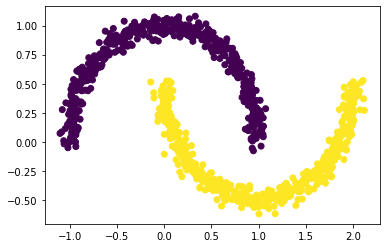

In [7]:
# visualize
plt.scatter(mm["X0"], mm["X1"], c=mm["label"])
plt.show()

In [8]:
# check shape
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
# create initial model
model_mm0 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_mm0.compile(
    loss=tf.keras.losses.BinaryFocalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

hist_mm0 = model_mm0.fit(X, y, epochs=20, verbose=0)

In [11]:
# check accuracy
model_mm0.evaluate(X, y)

32/32 [==============================] - 1s 5ms/step - loss: 0.0616 - accuracy: 0.8950


[0.061614543199539185, 0.8949999809265137]

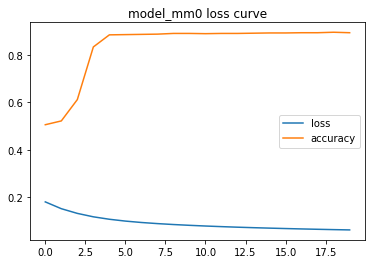

In [13]:
# plot history
pd.DataFrame(hist_mm0.history).plot()
plt.title("model_mm0 loss curve")
plt.show()

## 4) Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

In [15]:
# get fashion mnist data
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [16]:
# create label list
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]
len(class_names)

10

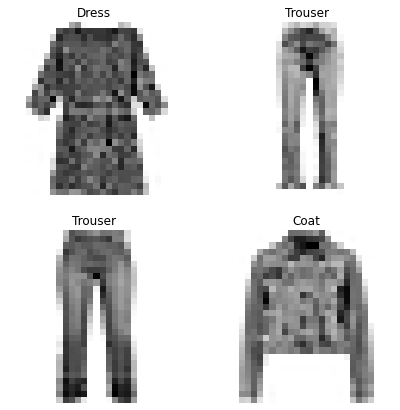

In [17]:
# plot more than 1 images
plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    sample_idx = np.random.randint(0, len(train_data))
    plt.imshow(train_data[sample_idx], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[sample_idx]])
    plt.axis(False)

In [18]:
# check input and label shapes
print("input shape:", train_data[0].shape)
print("output shape:", len(class_names))

input shape: (28, 28)
output shape: 10


In [19]:
# normalize data
train_data_norm = train_data / 255.
test_data_norm = test_data / 255.

In [94]:
# build initial model
model_fm0 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_fm0.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)

hist_fm0 = model_fm0.fit(
    train_data_norm, train_labels, epochs=10, 
    validation_data=(test_data_norm, test_labels),
    verbose=0
)

model_fm0.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3372 - accuracy: 0.8828


[0.3371942639350891, 0.8827999830245972]

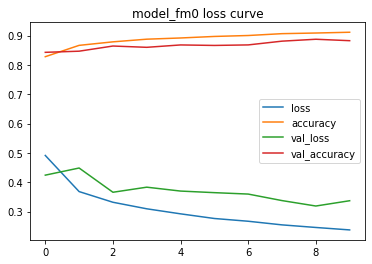

In [95]:
# plot loss curve
pd.DataFrame(hist_fm0.history).plot()
plt.title("model_fm0 loss curve")
plt.show()

## 5) Recreate TensorFlow's softmax activation function in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.

In [96]:
# create a tensor
tensor = tf.cast(
    tf.constant([[1, 2, 3, 6], [2, 4, 5, 6], [3, 8, 7, 6]]),
    dtype=tf.float32
)
tensor.numpy()

array([[1., 2., 3., 6.],
       [2., 4., 5., 6.],
       [3., 8., 7., 6.]], dtype=float32)

In [97]:
# tf sigmoid function
tf.keras.activations.softmax(tensor, axis=0)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0.09003057, 0.00242826, 0.01587624, 0.33333334],
       [0.24472848, 0.01794253, 0.11731043, 0.33333334],
       [0.6652409 , 0.9796292 , 0.86681336, 0.33333334]], dtype=float32)>

In [98]:
# define function
def softmax(x):
    e_x = tf.exp(x - tf.reduce_max(x))
    return e_x / tf.reduce_sum(e_x, axis=0)

In [99]:
# see results
softmax(tensor)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0.09003057, 0.00242826, 0.01587624, 0.3333333 ],
       [0.24472849, 0.01794253, 0.11731041, 0.3333333 ],
       [0.66524094, 0.9796292 , 0.8668133 , 0.3333333 ]], dtype=float32)>

## 6) Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediciton labels at the same time.

In [111]:
def show_imgs():
    plt.figure(figsize=(7, 7))
    for i in range(4):
        ax = plt.subplot(2, 2, i + 1)
        sample_idx = np.random.randint(0, len(train_data))
        plt.imshow(train_data[sample_idx], cmap=plt.cm.binary)
        plt.title(class_names[train_labels[sample_idx]])
        plt.axis(False)

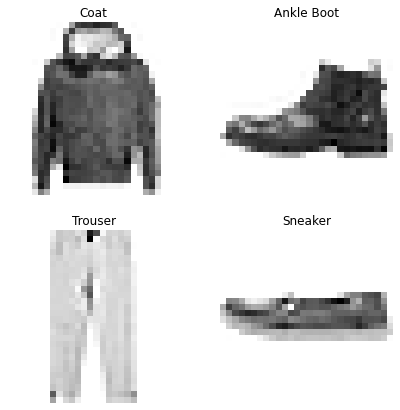

In [112]:
show_imgs()

In [ ]:
# rest is answered in 7.

## 7) Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the T-shirt class with their predictions.

In [102]:
# make preds
preds = model_fm0.predict(test_data_norm)

In [109]:
# https://www.tensorflow.org/tutorials/keras/classification#verify_predictions
def plot_image(i, preds, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    pred_label = np.argmax(preds)
    if pred_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[pred_label],
                                         100*np.max(preds),
                                         class_names[true_label]),
               color=color
    )

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

def plot_prediction_images():
    num_rows = 3
    num_cols = 2
    num_images = num_rows * num_cols 
    plt.figure(figsize = (2*2*num_cols , 2*num_rows))
    for i in range(num_images):
        plt.subplot(num_rows , 2*num_cols , 2*i+1)
        plot_image(i , preds[i], test_labels , test_data_norm)
        plt.subplot(num_rows , 2*num_cols , 2*i+2)
        plot_value_array(i , preds[i] ,  test_labels)
    plt.tight_layout()
    plt.show

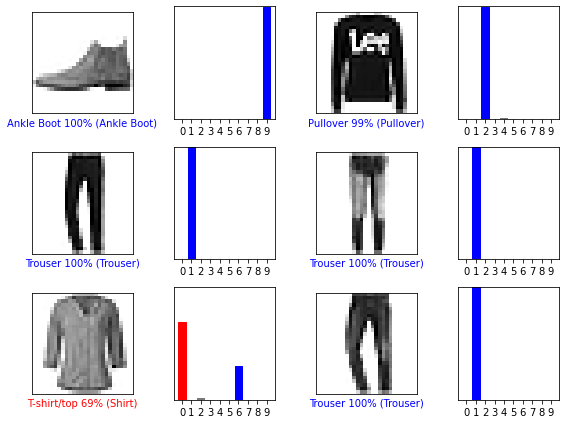

In [110]:
plot_prediction_images()